In [7]:
import re
import os
import cv2
import time
import shutil
import random
import requests
import codecs
import configparser
import numpy as np
from bs4 import BeautifulSoup as BS
from matplotlib import pyplot as plt
from chardet import detect
from pathlib import Path

In [8]:
def _load_config():
    config_path = "./config.ini"
    with open(config_path, "rb") as ef:
        config_encoding = detect(ef.read())["encoding"]
    config = configparser.ConfigParser()
    config.read_file(codecs.open(config_path, "r", config_encoding))
    return config

In [9]:
def _requests_session(config, status_forcelist=(500, 502, 504), session=None):
    session = requests.session()
    headers = {"user-agent": config["Requests_header"]["user-agent"]}
    session.headers.update(headers)
    return session

In [10]:
def mkdirs(path):
    if not os.path.exists(path):
        os.makedirs(path)

In [11]:
config = _load_config()

In [12]:
rs = _requests_session(config)

In [13]:
dir_origin = "./origin"

In [14]:
mkdirs("./origin")

In [15]:
url = "https://webreg.tpech.gov.tw/ValidateCode.aspx"

In [16]:
i = 0
while(i < 200):
    save_path = "./origin/{}.png".format(str(i).zfill(3))
    res = rs.get(url, stream=True)
    if res.status_code == 200:
        with open(save_path, "wb") as f:
            for chunk in res.iter_content(1024):
                f.write(chunk)
    i+=1
    time.sleep(random.uniform(1, 2))

In [17]:
img_list = list(Path(dir_origin).iterdir())

In [18]:
str(img_list[0])

'origin\\000.png'

In [19]:
img_path = img_list[0]

In [20]:
image = cv2.imread(str(img_path))
image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
# image_r = 225 - image

In [ ]:
# def ero(img):
#     kernel = np.ones((2, 2), np.uint8)
#     return cv2.erode(img, kernel, iterations=1)

In [ ]:
# def dil(img):
#     kernel = np.ones((2, 2), np.uint8)
#     return cv2.dilate(img, kernel, iterations=1)

In [26]:
# def mor_open(img):
#     kernel = np.ones((2, 2), np.uint8)
#     return cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

In [34]:
def mor_close(img):
    kernel = np.ones((2, 2), np.uint8)
    return cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

In [28]:
# cv2.imwrite("./test.png", image)

In [22]:
def crop_img(img, x, w, y, h):
    return img[y:y+h, x:x+w]

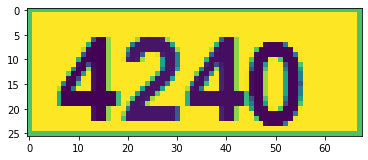

In [43]:
plt.imshow(image)

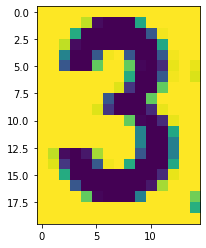

In [23]:
plt.imshow(crop_img(image, 5, 15, 5, 20))

In [27]:
a = cv2.copyMakeBorder(crop_img(image, 5, 15, 5, 20), 0, 0, 2, 3,cv2.BORDER_CONSTANT, value=255)

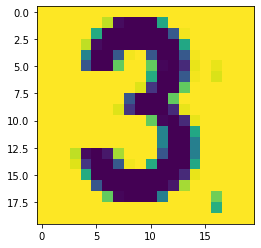

In [37]:
plt.imshow(a)

In [107]:
crop_list = []
for img_file in img_list:
    img_path = str(img_file)
    image = cv2.imread(str(img_path))
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    crop_list.append(crop_img(image, 5, 15, 5, 20))
    crop_list.append(crop_img(image, 18, 15, 5, 20))
    crop_list.append(crop_img(image, 31, 15, 5, 20))
    crop_list.append(crop_img(image, 43, 15, 5, 20))

In [108]:
len(crop_list)

800

In [115]:
dir_crop = "./crop"
mkdirs(dir_crop)

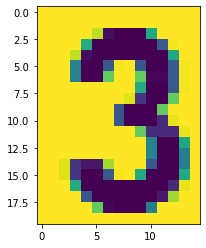

In [116]:
plt.imshow(mor_close(crop_list[0]))

In [117]:
i = 0
for image in crop_list:
    img_resize = cv2.copyMakeBorder(crop_img(mor_close(image), 5, 15, 5, 20), 0, 0, 2, 3,cv2.BORDER_CONSTANT, value=255)
#     cv2.imwrite("./{}/{}-{}.png".format(dir_crop, str(i//4).zfill(3), i%4), img_resize)
    cv2.imwrite("./{}/{}.png".format(dir_crop, str(i).zfill(3)), img_resize)
    i+=1

In [34]:
# plt.imshow(image)

In [35]:
# plt.imshow(image[5:25, 5:20])

In [36]:
# plt.imshow(mor_close(image[5:25, 5:20]))

In [37]:
# plt.imshow(mor_close(image[5:25, 18:33]))

In [38]:
# plt.imshow(mor_close(image[5:25, 31:46]))

In [39]:
# plt.imshow(image[5:25, 43:58])

In [40]:
# plt.imshow(mor_close(image[5:25, 43:58]))

In [119]:
dir_resize = "./resize"

In [120]:
mkdirs(dir_resize)

In [121]:
i = 0
for image in crop_list:
    img_resize = cv2.copyMakeBorder(crop_img(mor_close(image), 5, 15, 5, 20), 0, 0, 2, 3,cv2.BORDER_CONSTANT, value=255)
    img_resize = cv2.resize(img_resize, (200, 200), interpolation=cv2.INTER_AREA)
#     cv2.imwrite("./{}/{}-{}.png".format(dir_resize, str(i//4).zfill(3), i%4), img_resize)
    cv2.imwrite("./{}/{}.png".format(dir_resize, str(i).zfill(3)), img_resize)
    i+=1

In [154]:
crop_list = list(Path(dir_crop).iterdir())

In [159]:
dir_label = "./label"

In [162]:
mkdirs(dir_label)

In [163]:
label_list = list(Path(dir_label).iterdir())

In [164]:
len(label_list)

0

In [165]:
crop_list[len(label_list):]

[WindowsPath('crop/000.png'),
 WindowsPath('crop/001.png'),
 WindowsPath('crop/002.png'),
 WindowsPath('crop/003.png'),
 WindowsPath('crop/004.png'),
 WindowsPath('crop/005.png'),
 WindowsPath('crop/006.png'),
 WindowsPath('crop/007.png'),
 WindowsPath('crop/008.png'),
 WindowsPath('crop/009.png'),
 WindowsPath('crop/010.png'),
 WindowsPath('crop/011.png'),
 WindowsPath('crop/012.png'),
 WindowsPath('crop/013.png'),
 WindowsPath('crop/014.png'),
 WindowsPath('crop/015.png'),
 WindowsPath('crop/016.png'),
 WindowsPath('crop/017.png'),
 WindowsPath('crop/018.png'),
 WindowsPath('crop/019.png'),
 WindowsPath('crop/020.png'),
 WindowsPath('crop/021.png'),
 WindowsPath('crop/022.png'),
 WindowsPath('crop/023.png'),
 WindowsPath('crop/024.png'),
 WindowsPath('crop/025.png'),
 WindowsPath('crop/026.png'),
 WindowsPath('crop/027.png'),
 WindowsPath('crop/028.png'),
 WindowsPath('crop/029.png'),
 WindowsPath('crop/030.png'),
 WindowsPath('crop/031.png'),
 WindowsPath('crop/032.png'),
 WindowsPa

In [169]:
for crop_path in crop_list[len(list(Path(dir_label).iterdir())):]:
#     plt.imshow(cv2.imread(str(crop_path)))
    print(crop_path.name)
    img_label = input()
    shutil.copy(crop_path, "{}/{}_{}.png".format(dir_label, crop_path.stem, img_label))

246.png
0
247.png
5
248.png
7
249.png
4
250.png
1
251.png
6
252.png
5
253.png
5
254.png
7
255.png
2
256.png
1
257.png
4
258.png
7
259.png
6
260.png
6
261.png
3
262.png
9
263.png
2
264.png
4
265.png
4
266.png
7
267.png
0
268.png
1
269.png
9
270.png
5
271.png
5
272.png
3
273.png
1
274.png
5
275.png
6
276.png
6
277.png
4
278.png
2
279.png
3
280.png
7
281.png
1
282.png
4
283.png
1
284.png
3
285.png
2
286.png
2
287.png
8
288.png
8
289.png
5
290.png
7
291.png
4
292.png
4
293.png
4
294.png
7
295.png
6
296.png
9
297.png
3
298.png
0
299.png
3
300.png
3
301.png
6
302.png
4
303.png
6
304.png
7
305.png
9
306.png
1
307.png
3
308.png
8
309.png
6
310.png
2
311.png
8
312.png
8
313.png
7
314.png
3
315.png
0
316.png
0
317.png
5
318.png
2
319.png
4
320.png
2
321.png
3
322.png
1
323.png
8
324.png
4
325.png
1
326.png
9
327.png
8
328.png
5
329.png
4
330.png
9
331.png
6
332.png
4
333.png
9
334.png
5
335.png
1
336.png
0
337.png
9
338.png
5
339.png
2
340.png
9
341.png
6
342.png
9
343.png
1
344.png
1
345.png
8


In [170]:
dir_check = "./check"

In [177]:
mkdirs(dir_check)

In [178]:
label_list = list(Path(dir_label).iterdir())

In [179]:
resize_list = list(Path(dir_resize).iterdir())

In [180]:
for resize, label in zip(resize_list, label_list):
    shutil.copy(resize, "{}/{}".format(dir_check, label.name))

In [44]:
mkdirs(dir_label)

In [40]:
crop_path = crop_list[0]

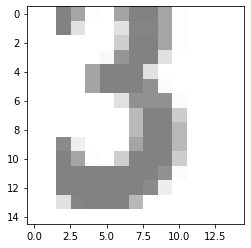

In [42]:
plt.imshow(cv2.imread(str(crop_path)))

In [45]:
img_label = input()

3


In [47]:
shutil.copy(crop_path, "{}/{}.png".format(dir_label, img_label))

'./label/3.png'